In [1]:
import numpy as np
import re
from matplotlib import pyplot as plt

filename = "USCities.txt"


Bad key "text.kerning_factor" on line 4 in
/Users/parulgupta/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
def read_data(file):
    with open(file, 'r') as f:
        lines = f.readlines()

    return lines

In [3]:
def convert_to_numpy(lines):
    X = []
    Y = []
    for l in lines:
        l = l.strip()
        name = l.split(" ")
        y = name[0]
        if re.search('[a-zA-Z]', name[1]):
            y += " " + name[1]
            if re.search('[a-zA-Z]', name[2]):
                y += " " + name[2]
        x = re.findall(r'[0-9]+.*', l)
        Y.append(y)
        X.append([float(i) for i in x[0].strip().split(" ")])    
    return np.square(np.array(X)), Y

In [4]:
def get_gram(X, Y, d):
    n = X.shape[0]
    gram = np.zeros_like(X)
    for i in range(gram.shape[0]):
        for j in range(gram.shape[1]):
            # From the equation
            # (PP^T)_{i,j} = -\frac{1}{2}\left[D_{i,j} - \frac{1}{n}\sum_{k=1}^n D_{i,k} - \frac{1}{n}\sum_{k=1}^nD_{j,k} + \frac{1}{n^2}\sum_{l=1}^n\sum_{k=1}^nD_{k,l}]
            first_term = X[i][j]
            second_term = (1/n) * np.sum(X, axis=1)[i]
            third_term = (1/n) * np.sum(X, axis=1)[j]
            fourth_term = (1/n**2) * np.sum(X)
            gram[i][j] = -0.5 * (first_term - second_term - third_term + fourth_term)
    return gram

In [5]:
def get_p(gram, d):
    evals, evecs = np.linalg.eig(gram)
    P = np.matmul(evecs[:,:d], np.sqrt(np.diag(evals[:d])))
    return P

In [6]:
def plot_graph(P, Y):
    plt.figure()
    plt.scatter(P[:, 0], P[:,1])
    for i in range(len(P)):
        plt.annotate(Y[i], (P[i][0], P[i][1]))
    plt.title('US Cities')
    plt.show()

In [7]:
def inverting_cities(P):
    P[:, 1] = -1*P[:, 1]
    return P

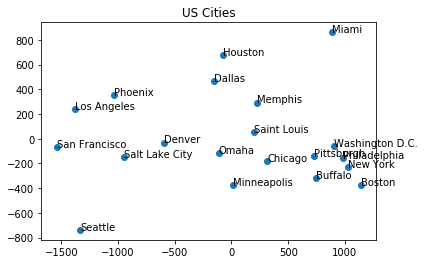

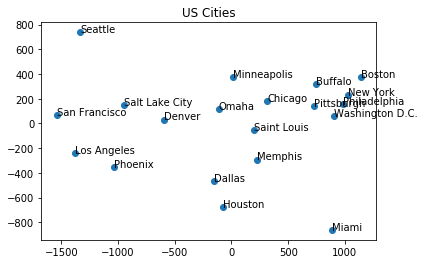

In [8]:
def main():
    lines = read_data('USCities.txt')
    X, Y = convert_to_numpy(lines)
    PP_T = get_gram(X, Y, 2)
    P = get_p(PP_T, 2)
    plot_graph(P, Y)
    
    P = inverting_cities(P)
    plot_graph(P, Y)

main()